# First Test

In [1]:
import infrared as ir

num_colors = 3
num_nodes = 4
edges = [(1,2),(1,4),(2,3),(3,4)]
cycles = [(1,2,3,4)]

## Set up the model

In [2]:
model = ir.Model()

# dummy variable to avoid index transformations
model.add_variables(1,(0,0))

# add one variable per node
model.add_variables(num_nodes,num_colors)

# define NotEquals constraints in Python
ir.def_constraint_class('NotEquals',
    lambda i,j: [i,j], # signature and dependencies
    lambda x, y: x!=y)  # constraint semantics

# add one inequality constraint per edge 
model.add_constraints(NotEquals(i,j) for i,j in edges)

# define cardinality for sets of 4 variables
ir.def_function_class('Card', # define "cardinality"
    lambda i, j, k, l: [i,j,k,l], # signature, dependencies
    lambda x,y,z,w: len({x,y,z,w}))  # function evaluation

# add the cardinality function for every cycle
model.add_functions([Card(i,j,k,l) for i,j,k,l in cycles], 'card')

model.set_feature_weight(-1,'card') # set up in order to *minimize*

solver = ir.Optimizer(model)
print(f'Tree width: {solver.treewidth()}')

Tree width: 3


## Draw the dependency graph

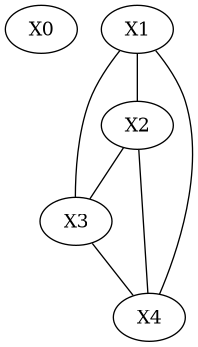

In [3]:
from IPython.display import Image
import re

# Plot dependency graph
filename = 'dependency_graph.dot'
model.write_graph(filename, True)

ir.dotfile_to_png(filename)
filename = re.sub(r"dot$","png",filename)

Image(filename=filename)

## Plot the tree decomposition

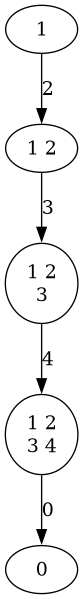

In [4]:
filename="treedecomp"
solver.plot_td(filename,'png')
Image(filename=filename+".png")

## Generate colorings

In [5]:
def assignment_to_coloring(a):
        colors=["red","green","blue"]
        coloring = {i:colors[v] for i,v in enumerate(a.values())}
        del coloring[0]
        return coloring

In [6]:
def plot_coloring(coloring, filename):
    import graphviz

    G = graphviz.Graph('coloring', engine="fdp")

    for i in range(1,num_nodes+1):
        G.node(f'{i}', style="filled", color=coloring[i])
    for i,j in edges:
        G.edge(f'{i}',f'{j}')

    G.render(filename, format='png', cleanup=True)

## Sampling

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
 
solver = ir.Sampler(model)

### Existing sampling method


Sample #1


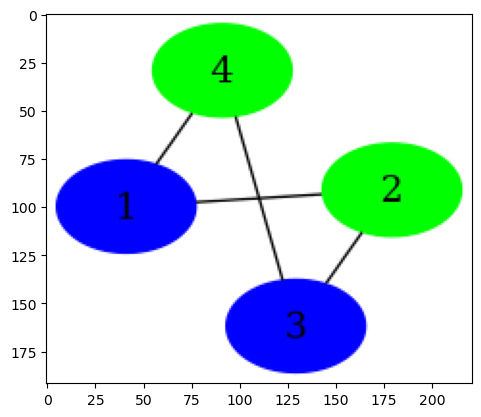


Sample #2


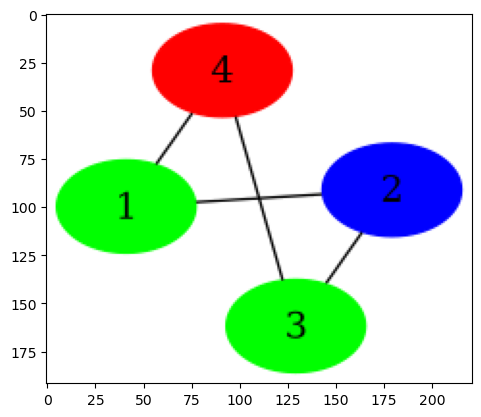


Sample #3


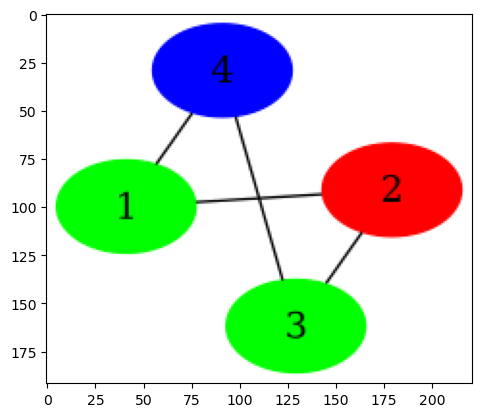


Sample #4


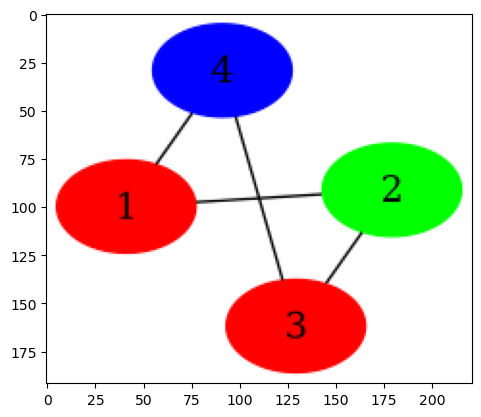


Sample #5


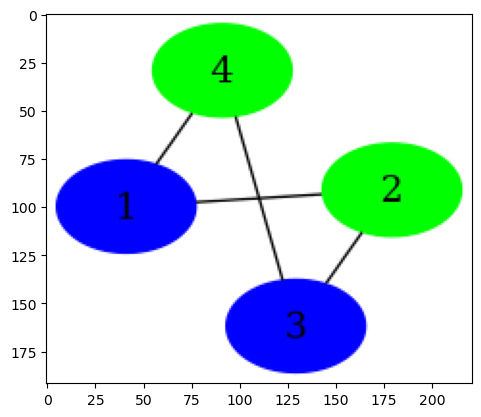


Sample #6


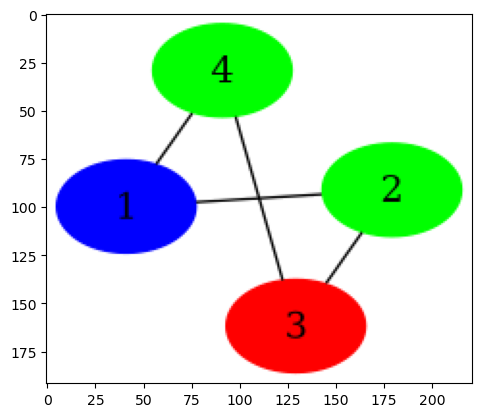


Sample #7


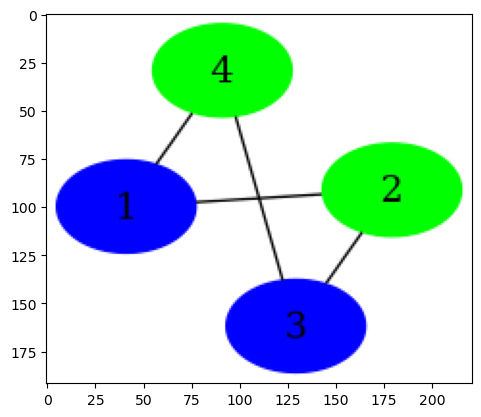


Sample #8


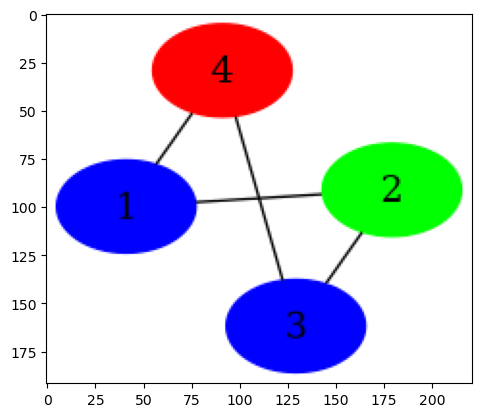


Sample #9


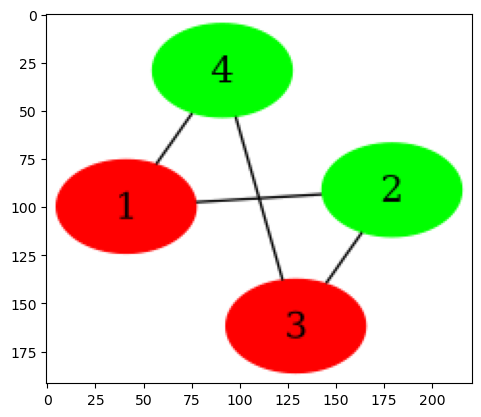


Sample #10


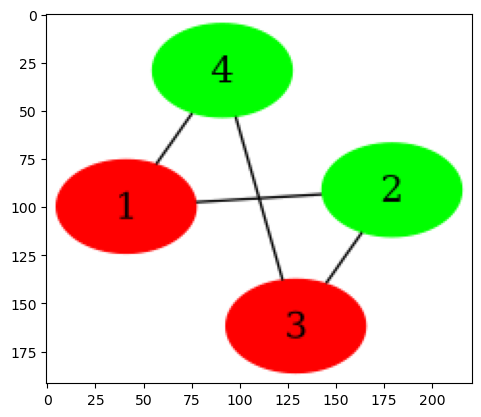


Sample #11


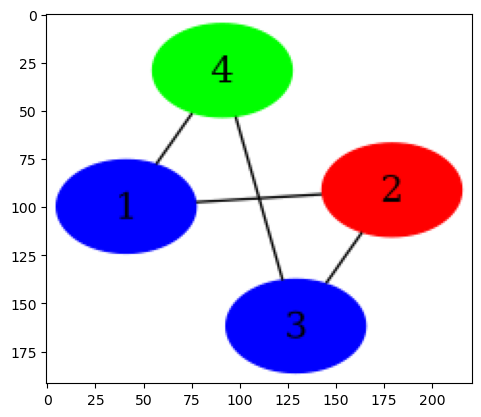


Sample #12


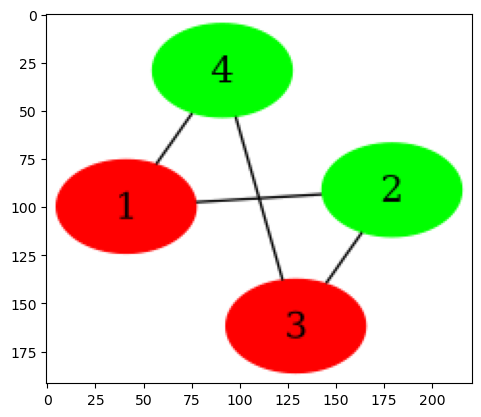


Sample #13


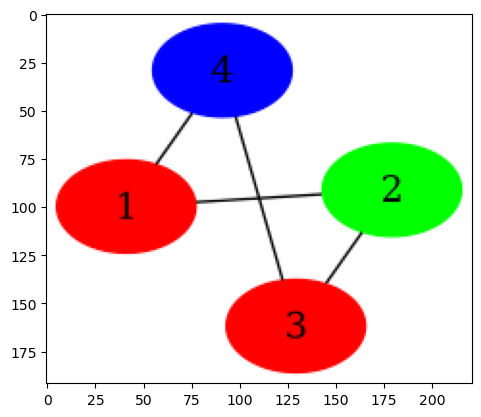


Sample #14


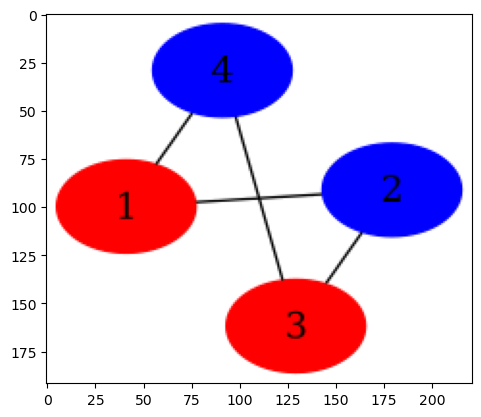


Sample #15


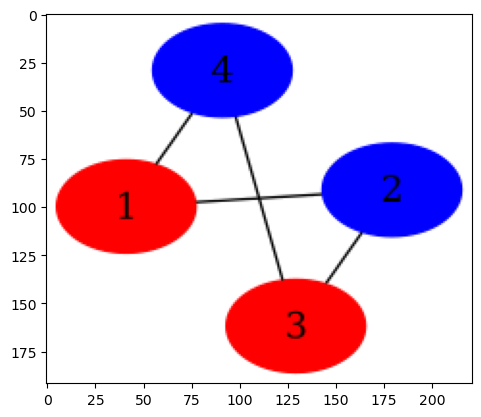


Sample #16


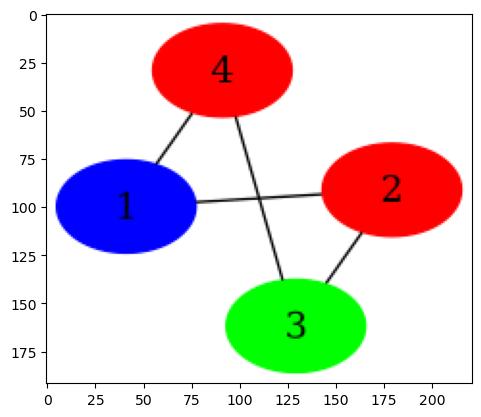


Sample #17


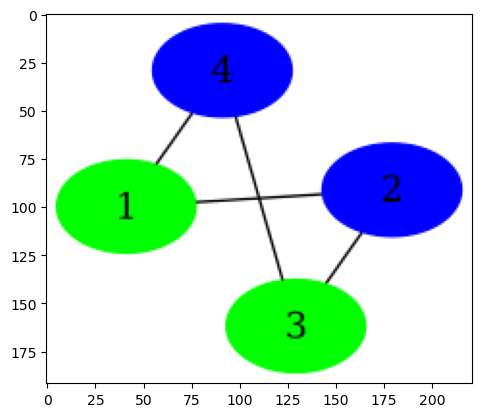


Sample #18


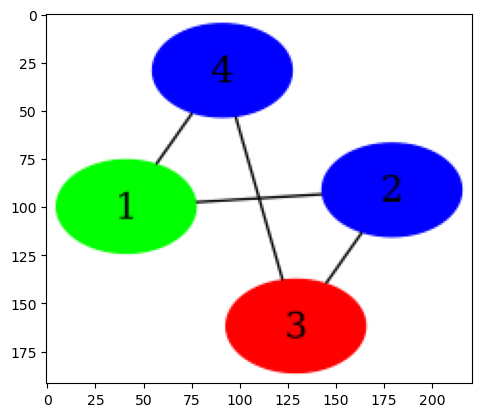


Sample #19


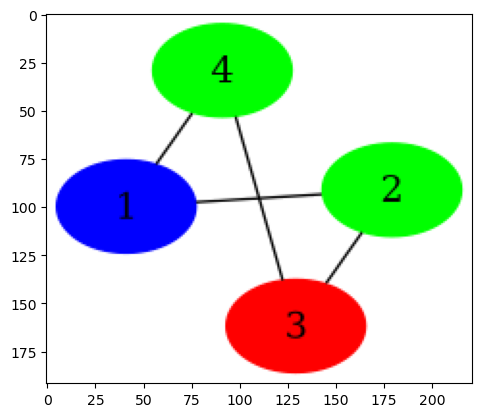


Sample #20


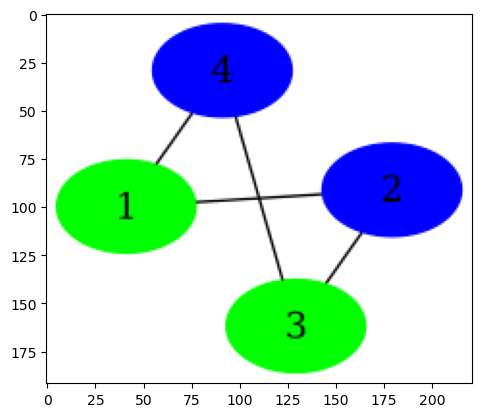


Sample #21


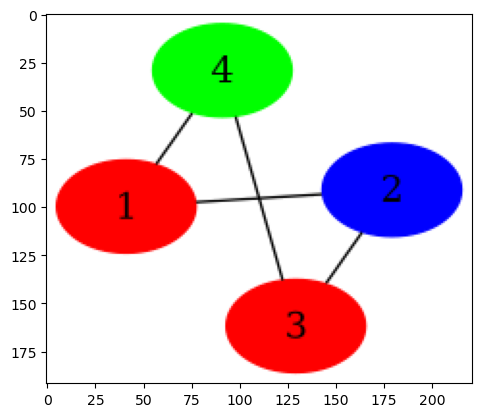


Sample #22


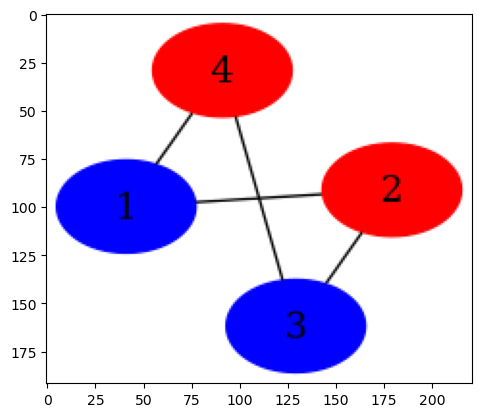


Sample #23


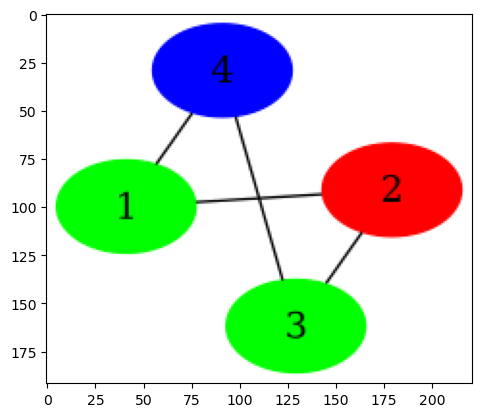


Sample #24


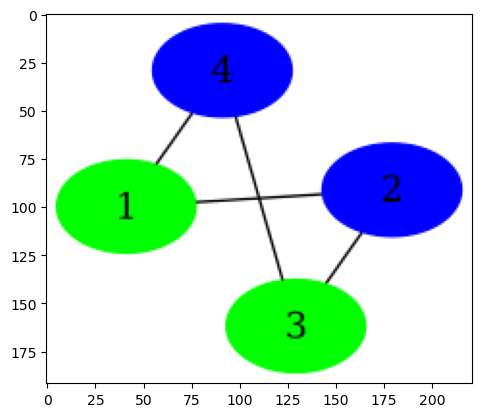


Sample #25


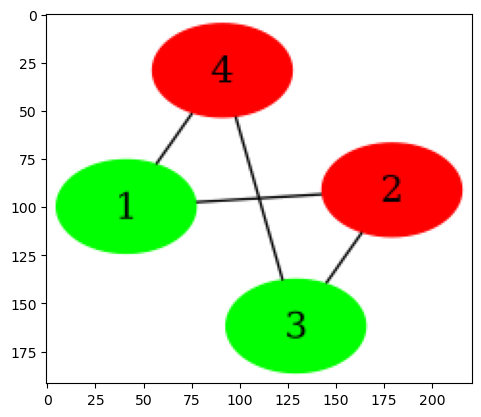

In [8]:
for i in range(1, 26):
    print(f'\nSample #{i}')

    assignment = solver.test_sample(non_redundant=False)
    coloring = assignment_to_coloring(assignment)

    plot_coloring(coloring, f'colored_graph')
    img = Image.open(f'colored_graph.png')
    plt.imshow(img)
    plt.show()

### Naive non-redundant sampling method


Sample #1
sample id: 183
list of previous samples: []


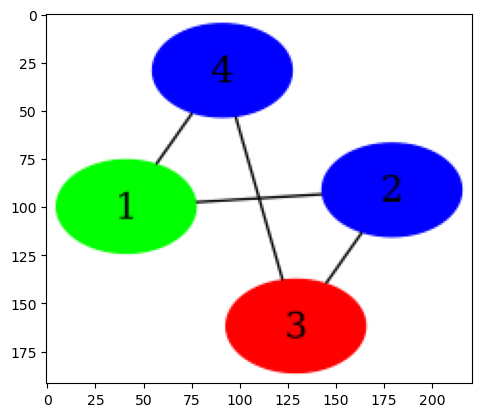


Sample #2
sample id: 57
list of previous samples: [183]


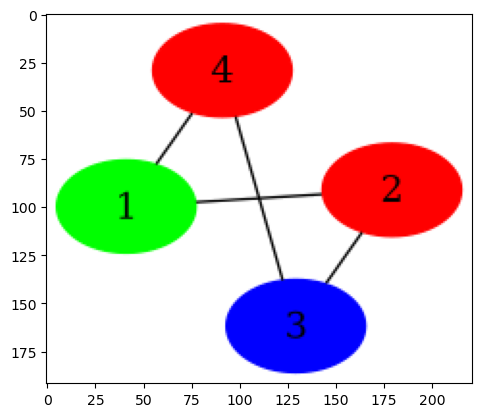


Sample #3
sample id: 60
list of previous samples: [183, 57]


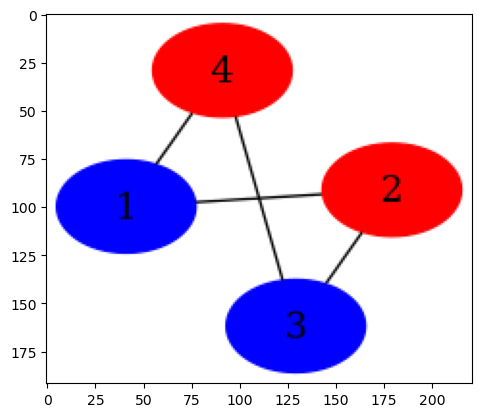


Sample #4
sample id: 144
list of previous samples: [183, 57, 60]


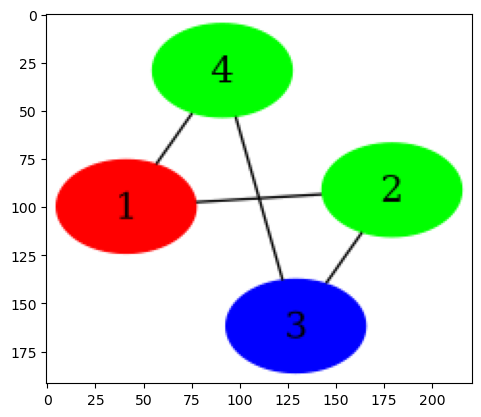


Sample #5
sample id: 30
list of previous samples: [183, 57, 60, 144]


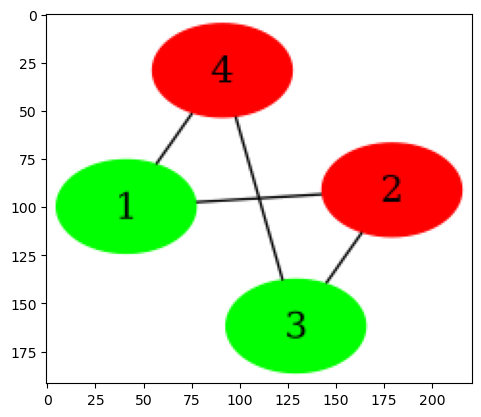


Sample #6
sample id: 180
list of previous samples: [183, 57, 60, 144, 30]


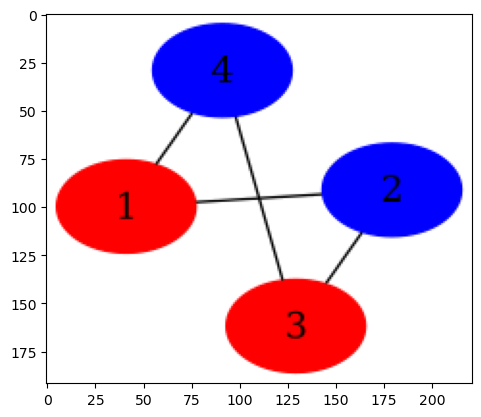


Sample #7
sample id: 192
list of previous samples: [183, 57, 60, 144, 30, 180]


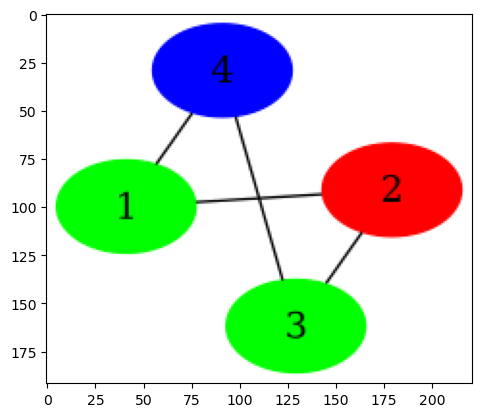


Sample #8
sample id: 150
list of previous samples: [183, 57, 60, 144, 30, 180, 192]


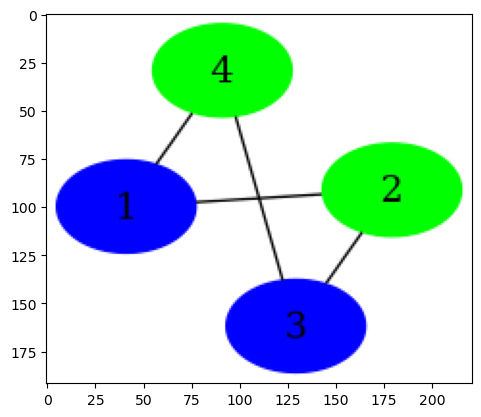


Sample #9
sample id: 210
list of previous samples: [183, 57, 60, 144, 30, 180, 192, 150]


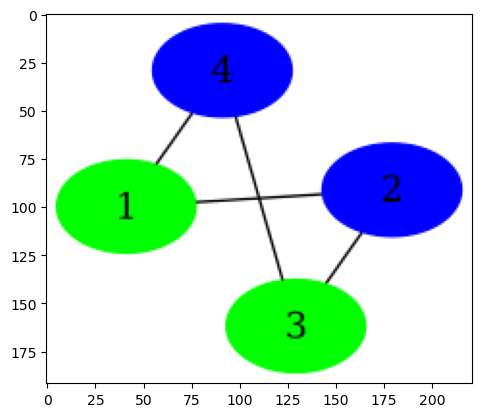


Sample #10
sample id: 96
list of previous samples: [183, 57, 60, 144, 30, 180, 192, 150, 210]


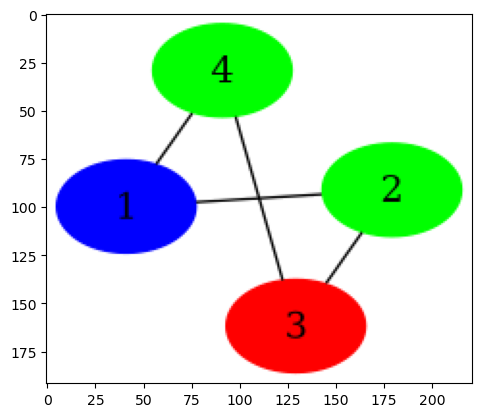


Sample #11
sample id: 90
list of previous samples: [183, 57, 60, 144, 30, 180, 192, 150, 210, 96]


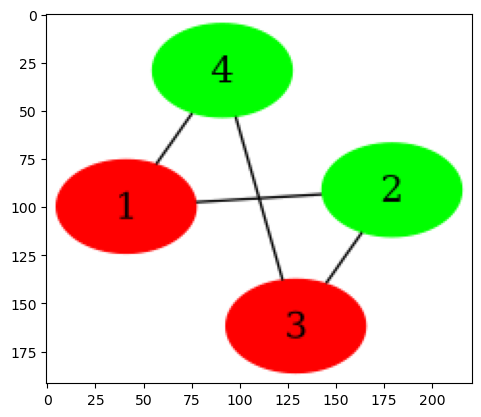


Sample #12
sample id: 141
list of previous samples: [183, 57, 60, 144, 30, 180, 192, 150, 210, 96, 90]


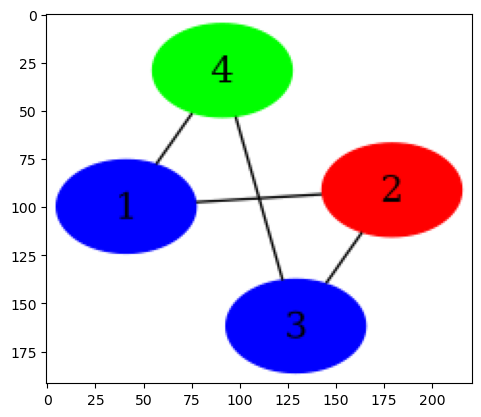


Sample #13
sample id: 48
list of previous samples: [183, 57, 60, 144, 30, 180, 192, 150, 210, 96, 90, 141]


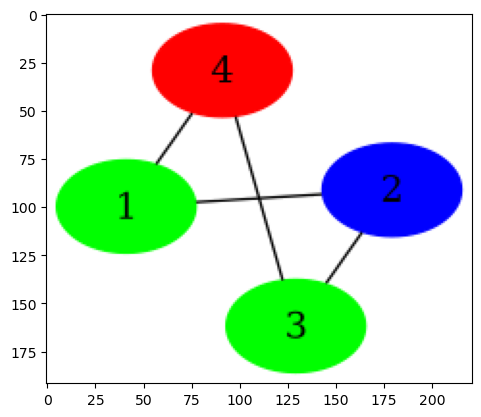


Sample #14
sample id: 33
list of previous samples: [183, 57, 60, 144, 30, 180, 192, 150, 210, 96, 90, 141, 48]


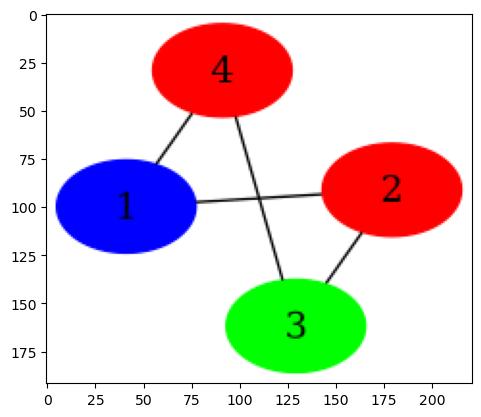


Sample #15
sample id: 207
list of previous samples: [183, 57, 60, 144, 30, 180, 192, 150, 210, 96, 90, 141, 48, 33]


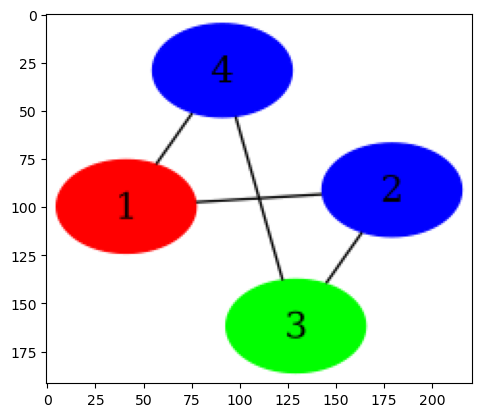


Sample #16
sample id: 171
list of previous samples: [183, 57, 60, 144, 30, 180, 192, 150, 210, 96, 90, 141, 48, 33, 207]


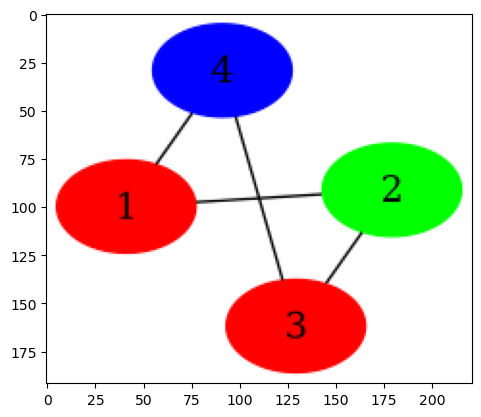


Sample #17
sample id: 99
list of previous samples: [183, 57, 60, 144, 30, 180, 192, 150, 210, 96, 90, 141, 48, 33, 207, 171]


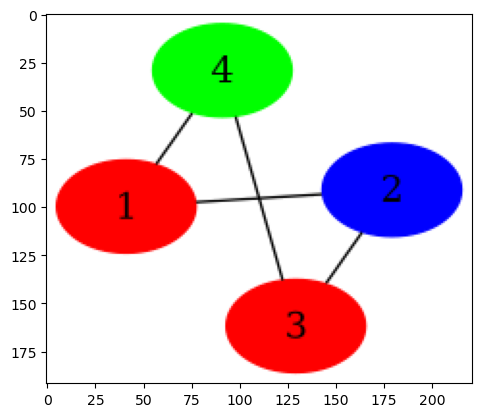


Sample #18
sample id: 69
list of previous samples: [183, 57, 60, 144, 30, 180, 192, 150, 210, 96, 90, 141, 48, 33, 207, 171, 99]


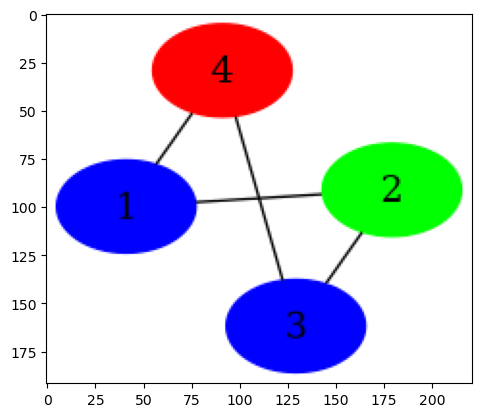


Sample #19
No new sample found!

Sample #20
No new sample found!

Sample #21
No new sample found!

Sample #22
No new sample found!

Sample #23
No new sample found!

Sample #24
No new sample found!

Sample #25
No new sample found!


In [9]:
for i in range(1, 26):
    print(f'\nSample #{i}')
    
    assignment = solver.test_sample(non_redundant=True)

    if assignment:
        coloring = assignment_to_coloring(assignment)

        plot_coloring(coloring, f'colored_graph')
        img = Image.open(f'colored_graph.png')
        plt.imshow(img)
        plt.show()